## **Entrenamiento de modelos predictivos**
* Modelos a comparar:
    * Regresión lineal.
    * Árbol de decisión.
    * Bosque aleatorio.
    * XGBoost.
    * Ensamble de modelos.
    * LightGBM.
    * Multi-Layer Percpetron (MLP)-
    * MLP residual.
    * Árbol de decisión con Log.
    * Bosque aleatorio con Log.
    * XGBoost con Log.
    * Ensamble de modelos con Log.

In [11]:
# Cargar librerías
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Add, Activation
import matplotlib.pyplot as plt
import joblib

In [12]:
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

from functions.preparation import data_version_a, data_version_b

In [13]:
path_no_outliers_data = "../data/processed/no_outliers_data.csv"

# Dataset version A (para regresión lineal y MLPs)
(X_train_a, X_train_scaled_a, X_test_scaled_a, y_train_scaled_a, y_test_a, 
 x_scaler, y_scaler, encoding, global_mean_a, features_a,
 categorical_columns, numerical_columns_a) = data_version_a(path_no_outliers_data)

# Dataset version B (para decision tree, random forest, XGBoost y LightGBM)
(X_train_b,
 X_test_b,
 y_train_b,
 y_test_b,
 global_mean_b,
 maps_encoding,
 features_b, numerical_columns_b) = data_version_b(path_no_outliers_data, log_transformed=False)

# Dataset version C (para decision tree, random forest, XGBoost y LightGBM pero con y_train con Log)
(X_train_c,
 X_test_c,
 y_train_c,
 y_test_c,
 global_mean_c,
 maps_encoding_c,
 features_c, numerical_columns_c) = data_version_b(path_no_outliers_data, log_transformed=True)



In [14]:
X_train_scaled_a

power_kw  fuel_consumption_l_100km  mileage_in_km       age  \
87169  -0.994652                  0.968527       2.161786  2.716017   
51560  -0.576231                 -0.937284       0.174281 -0.544385   
30787  -0.795404                 -0.199551      -0.650336 -0.736173   
14265  -0.655930                 -0.445462      -1.115623 -1.311538   
119973 -1.094276                 -0.199551      -1.154978 -1.311538   
...          ...                       ...            ...       ...   
146449  0.081289                  0.476705       0.681029  0.606345   
119906 -0.655930                 -0.629895      -1.148779 -1.311538   
17730   1.316629                  0.353749       0.490176  0.989922   
28030  -0.357057                 -0.322506      -0.628408 -0.544385   
15725   1.515877                  1.829215       1.648457  1.948863   

        model_encoded  brand_aston-martin  brand_audi  brand_bentley  \
87169       -0.524074                   0           0              0   
51560       -0.167822                   0           0              0   
30787       -0.431256                   0           0              0   
14265        0.767134                   0           1              0   
119973      -0.504059                   0           0              0   
...               ...                 ...         ...            ...   
146449      -0.691844                   0           0              0   
119906       0.191042                   0           0              0   
17730       -0.524068                   0           0              0   
28030        0.712543                   0           0              0   
15725        0.618706                   0           0              0   

        brand_bmw  brand_cadillac  ...  color_grey  color_orange  color_red  \
87169           0               0  ...           0             0          0   
51560           0               0  ...           0             0          0   
30787           0               0  ...           0             0          0   
14265           0               0  ...           0             0          0   
119973          0               0  ...           0             0          0   
...           ...             ...  ...         ...           ...        ...   
146449          0               0  ...           0             0          0   
119906          0               0  ...           0             0          0   
17730           1               0  ...           0             0          0   
28030           0               0  ...           1             0          0   
15725           1               0  ...           0             0          0   

        color_silver  color_violet  color_white  color_yellow  \
87169              0             0            0             0   
51560              0             0            1             0   
30787              0             0            0             0   
14265              0             0            0             0   
119973             0             0            0             0   
...              ...           ...          ...           ...   
146449             0             0            0             0   
119906             0             0            0             0   
17730              0             0            0             0   
28030              0             0            0             0   
15725              0             0            0             0   

        transmission_type_Manual  transmission_type_Semi-automatic  \
87169                          1                                 0   
51560                          1                                 0   
30787                          1                                 0   
14265                          1                                 0   
119973                         1                                 0   
...                          ...                               ...   
146449                         1                                 0   


In [15]:
X_train_b

power_kw  fuel_consumption_l_100km  mileage_in_km  age  model_encoded  \
87169       64.0                       7.4       252000.0   21   15983.737968   
51560       85.0                       4.3       101000.0    4   18881.129528   
30787       74.0                       5.5        38350.0    3   16738.628148   
14265       81.0                       5.1         3000.0    0   26485.118227   
119973      59.0                       5.5           10.0    0   16146.520548   
...          ...                       ...            ...  ...            ...   
146449     118.0                       6.6       139500.0   10   14619.268293   
119906      81.0                       4.8          481.0    0   21799.771819   
17730      180.0                       6.4       125000.0   12   15983.785714   
28030       96.0                       5.3        40016.0    4   26041.134783   
15725      190.0                       8.8       213000.0   17   25277.955592   

        brand_encoded  fuel_type_encoded  color_encoded  \
87169    14487.401518       18704.301672   19729.906599   
51560    19440.590775       21546.502118   21135.967172   
30787    14992.568004       14184.137476   20798.954620   
14265    23343.108698       18704.301672   19409.414681   
119973   22099.730198       18704.301672   19729.906599   
...               ...                ...            ...   
146449   17087.258810       18704.301672   19409.414681   
119906   22099.730198       18704.301672   19729.906599   
17730    20749.630459       18704.301672   19729.906599   
28030    17940.456587       18704.301672   21266.773589   
15725    20749.630459       18704.301672   19409.414681   

        transmission_type_encoded  
87169                14717.890571  
51560                14717.890571  
30787                14717.890571  
14265                14717.890571  
119973               14717.890571  
...                           ...  
146449               14717.890571  
119906               26188.679224  
17730                26188.679224  
28030                14717.890571  
15725                14717.890571  

[130419 rows x 9 columns]

In [16]:
X_train_c

power_kw  fuel_consumption_l_100km  mileage_in_km  age  model_encoded  \
87169       64.0                       7.4       252000.0   21   15983.737968   
51560       85.0                       4.3       101000.0    4   18881.129528   
30787       74.0                       5.5        38350.0    3   16738.628148   
14265       81.0                       5.1         3000.0    0   26485.118227   
119973      59.0                       5.5           10.0    0   16146.520548   
...          ...                       ...            ...  ...            ...   
146449     118.0                       6.6       139500.0   10   14619.268293   
119906      81.0                       4.8          481.0    0   21799.771819   
17730      180.0                       6.4       125000.0   12   15983.785714   
28030       96.0                       5.3        40016.0    4   26041.134783   
15725      190.0                       8.8       213000.0   17   25277.955592   

        brand_encoded  fuel_type_encoded  color_encoded  \
87169    14487.401518       18704.301672   19729.906599   
51560    19440.590775       21546.502118   21135.967172   
30787    14992.568004       14184.137476   20798.954620   
14265    23343.108698       18704.301672   19409.414681   
119973   22099.730198       18704.301672   19729.906599   
...               ...                ...            ...   
146449   17087.258810       18704.301672   19409.414681   
119906   22099.730198       18704.301672   19729.906599   
17730    20749.630459       18704.301672   19729.906599   
28030    17940.456587       18704.301672   21266.773589   
15725    20749.630459       18704.301672   19409.414681   

        transmission_type_encoded  
87169                14717.890571  
51560                14717.890571  
30787                14717.890571  
14265                14717.890571  
119973               14717.890571  
...                           ...  
146449               14717.890571  
119906               26188.679224  
17730                26188.679224  
28030                14717.890571  
15725                14717.890571  

[130419 rows x 9 columns]

In [17]:
y_train_scaled_a

array([[0.08622862],
       [0.25472547],
       [0.32025203],
       ...,
       [0.33825383],
       [0.35427543],
       [0.15823582]], shape=(130419, 1))

In [8]:
y_train_b


87169      4990.0
51560     14350.0
30787     17990.0
14265     28690.0
119973    15999.0
           ...   
146449    12490.0
119906    25950.0
17730     18990.0
28030     19880.0
15725      8990.0
Name: price_in_euro, Length: 130419, dtype: float64

In [9]:
y_train_c

87169      8.515392
51560      9.571575
30787      9.797627
14265     10.264339
119973     9.680344
            ...    
146449     9.432764
119906    10.163965
17730      9.851720
28030      9.897520
15725      9.103979
Name: price_in_euro, Length: 130419, dtype: float64

In [18]:
# Regresión lineal - Dataset A
LR = LinearRegression()

start_time = time.time()
LR.fit(X_train_scaled_a, y_train_scaled_a)
end_time = time.time()

print(f"Tiempo total de entrenamiento: {(end_time - start_time):.2f} segundos.\n")

lr_bundle = {
    "model": LR,
    "x_scaler": x_scaler,
    "y_scaler": y_scaler,
    "encoding": encoding,
    "global_mean": global_mean_a,
    "features": features_a,
    "categorical_columns": categorical_columns,
    "numerical_columns": numerical_columns_a,
    "training_time": (end_time - start_time),
    "training_medians": X_train_a[numerical_columns_a].median().to_dict()
}

path_file_linear_regression = "../models/linear_regression.pkl"

joblib.dump(lr_bundle, path_file_linear_regression)

Tiempo total de entrenamiento: 0.12 segundos.



['../models/linear_regression.pkl']

In [11]:
# Árbol de decisión - Dataset B
param_grid_dt = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error"],
    "splitter": ["best", "random"],
    "max_depth": [None],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [2, 4],
    "max_features": ["sqrt", "log2", None]
}

dt = DecisionTreeRegressor(random_state=123)

grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=16,
    verbose=1
)

start_time = time.time()
grid_search_dt.fit(X_train_b, y_train_b)
end_time = time.time()

print(f"Tiempo total de entrenamiento: {(end_time - start_time):.2f} segundos.\n")


print("Mejores hiperparámetros (Árbol de Decisión):")
print(grid_search_dt.best_params_)

dt_bundle = {
    "model": grid_search_dt.best_estimator_,
    "global_mean": global_mean_b,
    "maps_encoding": maps_encoding,
    "features": features_b,
    "training_time": (end_time - start_time),
    "training_medians": X_train_b[numerical_columns_b].median().to_dict(),
    "log_transformed": False
}


path_file_decision_tree = "../models/decision_tree.pkl"
joblib.dump(dt_bundle, path_file_decision_tree)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Tiempo total de entrenamiento: 575.86 segundos.

Mejores hiperparámetros (Árbol de Decisión):
{'criterion': 'absolute_error', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}


['../models/decision_tree.pkl']

In [12]:
# Bosque aleatorio - Dataset B
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestRegressor(random_state=123)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=16,
    verbose=1
)

start_time = time.time()
grid_search_rf.fit(X_train_b, y_train_b)
end_time = time.time()

print(f"Tiempo total de entrenamiento: {(end_time - start_time):.2f} segundos.\n")

print("Mejores hiperparámetros (Random Forest):")
print(grid_search_rf.best_params_)

rf_bundle = {
    "model": grid_search_rf.best_estimator_,
    "global_mean": global_mean_b,
    "maps_encoding": maps_encoding,
    "features": features_b,
    "training_time": (end_time - start_time),
    "training_medians": X_train_b[numerical_columns_b].median().to_dict(),
    "log_transformed": False
}


path_file_random_forest = "../models/random_forest.pkl"
joblib.dump(rf_bundle, path_file_random_forest)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/home/andres/.local/share/mamba/envs/ia-gpu/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Tiempo total de entrenamiento: 141.57 segundos.

Mejores hiperparámetros (Random Forest):
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


['../models/random_forest.pkl']

In [13]:
# XGBoost - Dataset B
param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [2, 10],
    "learning_rate": [0.01, 0.03],
    "subsample": [0.6, 1.0],
    "colsample_bytree": [0.6, 1.0],
    "gamma": [0, 1, 10],
    "reg_alpha": [0, 0.5],
    "reg_lambda": [1, 10],
    "tree_method": ["hist"]
}

xgb = XGBRegressor(random_state=123)

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=16,
    verbose=1
)

start_time = time.time()
grid_search_xgb.fit(X_train_b, y_train_b)
end_time = time.time()

print(f"Tiempo total de entrenamiento: {(end_time - start_time):.2f} segundos.\n")


print("Mejores hiperparámetros (XGBoost):")
print(grid_search_xgb.best_params_)

xgb_bundle = {
    "model": grid_search_xgb.best_estimator_,
    "global_mean": global_mean_b,
    "maps_encoding": maps_encoding,
    "features": features_b,
    "training_time": (end_time - start_time),
    "training_medians": X_train_b[numerical_columns_b].median().to_dict(),
    "log_transformed": False
}

path_file_xgboost = "../models/xgboost.pkl"
joblib.dump(xgb_bundle, path_file_xgboost)


Fitting 3 folds for each of 384 candidates, totalling 1152 fits


/home/andres/.local/share/mamba/envs/ia-gpu/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Tiempo total de entrenamiento: 239.19 segundos.

Mejores hiperparámetros (XGBoost):
{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0, 'tree_method': 'hist'}


['../models/xgboost.pkl']

In [14]:
# LightGBM - Dataset B
param_grid_lgbm = {
    "n_estimators": [100, 200],
    "max_depth": [3, 10],
    "learning_rate": [0.01, 0.1],
    "num_leaves": [20, 50],
    "subsample": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.5],
    "reg_lambda": [1, 10]
}

lgbm = LGBMRegressor(random_state=123)

grid_search_lgbm = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=16,
    verbose=0
)

start_time = time.time()
grid_search_lgbm.fit(X_train_b, y_train_b)
end_time = time.time()

print(f"Tiempo total de entrenamiento: {(end_time - start_time):.2f} segundos.\n")

print("Mejores hiperparámetros (LightGBM):")
print(grid_search_lgbm.best_params_)

lgbm_bundle = {
    "model": grid_search_lgbm.best_estimator_,
    "global_mean": global_mean_b,
    "maps_encoding": maps_encoding,
    "features": features_b,
    "training_time": (end_time - start_time),
    "training_medians": X_train_b[numerical_columns_b].median().to_dict(),
    "log_transformed": False
}

path_file_lgbm = "../models/lightgbm.pkl"
joblib.dump(lgbm_bundle, path_file_lgbm)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 86946, number of used features: 9
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 86946, number of used features: 9
[LightGBM] [Info] Start training from score 20291.489476
[LightGBM] [Info] Start training from score 20201.137085
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

['../models/lightgbm.pkl']

In [15]:
# Ensamble modelos (Random Forest + XGBoost) - Dataset B

# Random Forest
start_time = time.time()
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestRegressor(random_state=123)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=1,
    verbose=1
)

grid_search_rf.fit(X_train_b, y_train_b)

# XGBoost
param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [2, 10],
    "learning_rate": [0.01, 0.03],
    "subsample": [0.6, 1.0],
    "colsample_bytree": [0.6, 1.0],
    "gamma": [0, 1, 10],
    "reg_alpha": [0, 0.5],
    "reg_lambda": [1, 10],
    "tree_method": ["hist"]
}

xgb = XGBRegressor(random_state=123)

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=16,
    verbose=1
)

grid_search_xgb.fit(X_train_b, y_train_b)


# Extraer los parámetros del mejor modelo (tanto para RF como para XGBoost)
rf_params = grid_search_rf.best_params_
xgb_params = grid_search_xgb.best_params_

# Creación de modelos (RF y XGB) usando los parámetros
rf_clean = RandomForestRegressor(**rf_params, random_state=123)
xgb_clean = XGBRegressor(**xgb_params, random_state=123)

# Obtener predicciones usando cross_val_predict para que el meta-modelo no se memorice el entrenamiento
preds_rf_train = cross_val_predict(rf_clean, X_train_b, y_train_b, cv=5)
preds_xgb_train = cross_val_predict(xgb_clean, X_train_b, y_train_b, cv=5)

# Crear el dataset de entrenamiento para el Meta-Modelo (usando las predicciones de los modelos base) 
X_meta_train = np.column_stack([preds_rf_train, preds_xgb_train])

# Entrenar los modelos base con todo el dataset de entrenamiento
rf_clean.fit(X_train_b, y_train_b)
xgb_clean.fit(X_train_b, y_train_b)

# Entrenar el Meta-Modelo 
meta_model = RidgeCV()
meta_model.fit(X_meta_train, y_train_b)
end_time = time.time()

print(f"Tiempo total de entrenamiento: {(end_time - start_time):.2f} segundos.\n")

path_ensamble_model = "../models/ensamble_model.pkl"

ensamble_bundle = {
    # Los 3 motores del ensamble
    "base_model_rf": rf_clean,
    "base_model_xgb": xgb_clean,
    "meta_model": meta_model,
    
    # Los assets de preprocesamiento 
    "global_mean": global_mean_b,
    "maps_encoding": maps_encoding,
    "features": features_b,
    "training_time": (end_time - start_time),
    "training_medians": X_train_b[numerical_columns_b].median().to_dict(),
    "log_transformed": False
}


joblib.dump(ensamble_bundle, path_ensamble_model)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Tiempo total de entrenamiento: 1679.72 segundos.



['../models/ensamble_model.pkl']

In [19]:
# Perceptrón Multicapa (MLP) - Dataset A
_, input_dim = X_test_scaled_a.shape

def create_mlp_model(input_dim, dropout_rate):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation="relu")(inputs)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)

    x = Dense(32, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)

    x = Dense(16, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)

    outputs = Dense(1, activation="linear")(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer="nadam",
        loss="mae",
        metrics=["mae", "mse"]
    )
    return model

model_mlp = create_mlp_model(input_dim, dropout_rate=0.1)

path_file_mlp = "../models/mlp_model_best.keras"

callbacks = [
    EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.3, min_lr=1e-4, patience=5),
    ModelCheckpoint(
        filepath=path_file_mlp,
        monitor="val_loss",
        save_best_only=True,
        verbose=1
    )
]

start_time = time.time()

history_mlp = model_mlp.fit(
    X_train_scaled_a, y_train_scaled_a,
    epochs=150, batch_size=32,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

end_time = time.time()

print(f"Tiempo total de entrenamiento: {(end_time - start_time):.2f} segundos.\n")

mlp_assets = {
    "x_scaler": x_scaler,
    "y_scaler": y_scaler,
    "encoding": encoding,
    "global_mean": global_mean_a,
    "features": features_a,
    "categorical_columns": categorical_columns,
    "numerical_columns": numerical_columns_a,
    "training_time": (end_time - start_time),
    "training_medians": X_train_a[numerical_columns_a].median().to_dict(),
    "history": history_mlp.history
}

path_file_mlp_assets = "../models/mlp_assets.joblib"
joblib.dump(mlp_assets, path_file_mlp_assets)

Epoch 1/150
3651/3669 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.2394 - mae: 0.2394 - mse: 0.1879
Epoch 1: val_loss improved from inf to 0.04960, saving model to ../models/mlp_model_best.keras
3669/3669 ━━━━━━━━━━━━━━━━━━━━ 4s 713us/step - loss: 0.2388 - mae: 0.2388 - mse: 0.1872 - val_loss: 0.0496 - val_mae: 0.0496 - val_mse: 0.0061 - learning_rate: 0.0010
Epoch 2/150
3640/3669 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.0652 - mae: 0.0652 - mse: 0.0086
Epoch 2: val_loss improved from 0.04960 to 0.04948, saving model to ../models/mlp_model_best.keras
3669/3669 ━━━━━━━━━━━━━━━━━━━━ 3s 732us/step - loss: 0.0652 - mae: 0.0652 - mse: 0.0086 - val_loss: 0.0495 - val_mae: 0.0495 - val_mse: 0.0061 - learning_rate: 0.0010
Epoch 3/150
3605/3669 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.0629 - mae: 0.0629 - mse: 0.0081
Epoch 3: val_loss improved from 0.04948 to 0.04805, saving model to ../models/mlp_model_best.keras
3669/3669 ━━━━━━━━━━━━━━━━━━━━ 2s 651us/step - loss: 0.0629 - mae: 0.0629

['../models/mlp_assets.joblib']

In [20]:
# MLP residual - Dataset A

# Definición del bloque residual
def residual_block(x, units, dropout_rate):
    shortcut = x

    # Primera capa
    x = Dense(units, activation=None)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(dropout_rate)(x)

    # Segunda capa
    x = Dense(units, activation=None)(x)
    x = BatchNormalization()(x)

    # Ajuste del atajo si cambia la dimensión
    if shortcut.shape[-1] != units:
        shortcut = Dense(units, activation=None)(shortcut)

    # Conexión residual + activación
    x = Add()([x, shortcut])
    x = Activation("relu")(x)
    return x

def create_mlp_residual_model(input_dim, dropout_rate):
    inputs = Input(shape=(input_dim,))
    x = Dense(128, activation=None)(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(dropout_rate)(x)

    # Bloques residuales
    x = residual_block(x, 64, dropout_rate)
    x = residual_block(x, 32, dropout_rate)

    x = Dense(16, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)

    outputs = Dense(1, activation="linear")(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer="nadam",
        loss="mae",
        metrics=["mae", "mse"]
    )
    return model

_, input_dim = X_test_scaled_a.shape
model_mlp_residual = create_mlp_residual_model(input_dim=input_dim, dropout_rate=0.1)

path_file_mlp_residual = "../models/mlp_residual_model.keras"

callbacks = [
    EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, min_lr=1e-4, patience=20),
    ModelCheckpoint(
        filepath=path_file_mlp_residual,
        monitor="val_loss",
        save_best_only=True,
        verbose=1
    )
]

start_time = time.time()

history_residual = model_mlp_residual.fit(
    X_train_scaled_a, y_train_scaled_a,
    epochs=500, batch_size=64,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

end_time = time.time()

print(f"Tiempo total de entrenamiento: {(end_time - start_time):.2f} segundos.\n")

mlp_r_assets = {
    "x_scaler": x_scaler,
    "y_scaler": y_scaler,
    "encoding": encoding,
    "global_mean": global_mean_a,
    "features": features_a,
    "categorical_columns": categorical_columns,
    "numerical_columns": numerical_columns_a,
    "training_time": (end_time - start_time),
    "training_medians": X_train_a[numerical_columns_a].median().to_dict(),
    "history": history_residual.history
}

path_file_mlp_r_assets = "../models/mlp_r_assets.joblib"
joblib.dump(mlp_r_assets, path_file_mlp_r_assets)

Epoch 1/500
1814/1835 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2461 - mae: 0.2461 - mse: 0.1983
Epoch 1: val_loss improved from inf to 0.04973, saving model to ../models/mlp_residual_model.keras
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2448 - mae: 0.2448 - mse: 0.1969 - val_loss: 0.0497 - val_mae: 0.0497 - val_mse: 0.0061 - learning_rate: 0.0010
Epoch 2/500
1806/1835 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0656 - mae: 0.0656 - mse: 0.0115
Epoch 2: val_loss improved from 0.04973 to 0.04848, saving model to ../models/mlp_residual_model.keras
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0655 - mae: 0.0655 - mse: 0.0115 - val_loss: 0.0485 - val_mae: 0.0485 - val_mse: 0.0057 - learning_rate: 0.0010
Epoch 3/500
1796/1835 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0570 - mae: 0.0570 - mse: 0.0071
Epoch 3: val_loss improved from 0.04848 to 0.04673, saving model to ../models/mlp_residual_model.keras
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0570 - mae: 0.0570

['../models/mlp_r_assets.joblib']

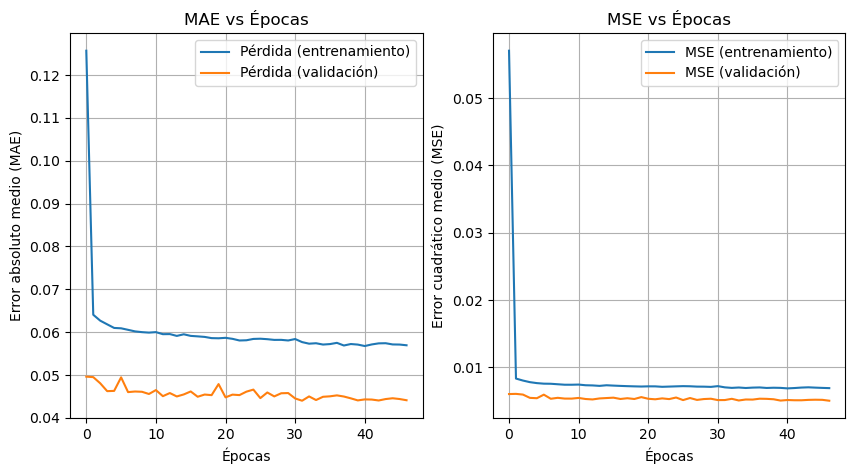

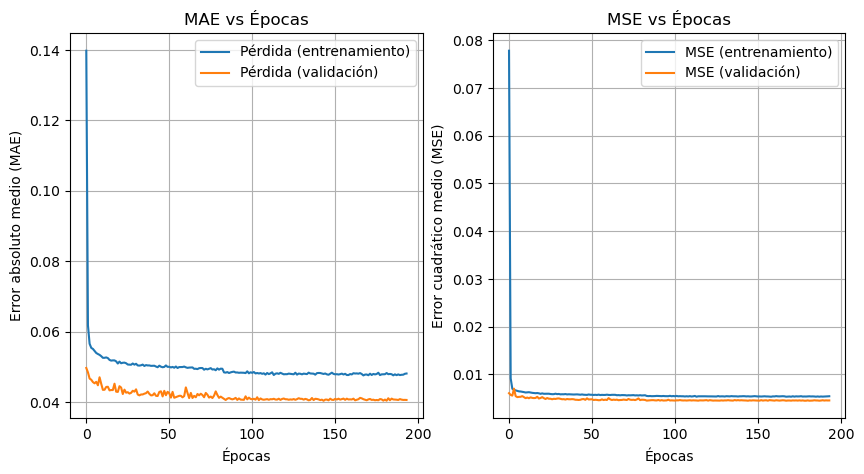

In [21]:
# Visualización del historial de entrenamiento

def graphics(history):
    hist = history.history
    loss, val_loss = hist["loss"], hist["val_loss"]
    mse, val_mse = hist["mse"], hist["val_mse"]

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(loss, label="Pérdida (entrenamiento)")
    plt.plot(val_loss, label="Pérdida (validación)")
    plt.title("MAE vs Épocas")
    plt.xlabel("Épocas")
    plt.ylabel("Error absoluto medio (MAE)")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(mse, label="MSE (entrenamiento)")
    plt.plot(val_mse, label="MSE (validación)")
    plt.title("MSE vs Épocas")
    plt.xlabel("Épocas")
    plt.ylabel("Error cuadrático medio (MSE)")
    plt.legend()
    plt.grid(True)
    plt.show()

graphics(history_mlp)

graphics(history_residual)


In [19]:
# Árbol de decisión Log - Dataset C
param_grid_dt_log = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error"],
    "splitter": ["best", "random"],
    "max_depth": [None],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [2, 4],
    "max_features": ["sqrt", "log2", None]
}

dt_log = DecisionTreeRegressor(random_state=123)

grid_search_dt_log = GridSearchCV(
    estimator=dt_log,
    param_grid=param_grid_dt_log,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=16,
    verbose=1
)

start_time = time.time()
grid_search_dt_log.fit(X_train_c, y_train_c)
end_time = time.time()

print(f"Tiempo total de entrenamiento: {(end_time - start_time):.2f} segundos.\n")


print("Mejores hiperparámetros (Árbol de Decisión):")
print(grid_search_dt_log.best_params_)

dt_log_bundle = {
    "model": grid_search_dt_log.best_estimator_,
    "global_mean": global_mean_c,
    "maps_encoding": maps_encoding_c,
    "features": features_c,
    "training_time": (end_time - start_time),
    "training_medians": X_train_c[numerical_columns_c].median().to_dict(),
    "log_transformed": True
}


path_file_decision_tree_log = "../models/decision_tree_log.pkl"
joblib.dump(dt_log_bundle, path_file_decision_tree_log)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Tiempo total de entrenamiento: 603.99 segundos.

Mejores hiperparámetros (Árbol de Decisión):
{'criterion': 'absolute_error', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}


['../models/decision_tree_log.pkl']

In [5]:
# Bosque aleatorio Log - Dataset C
param_grid_rf_log = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

rf_log = RandomForestRegressor(random_state=123)

grid_search_rf_log = GridSearchCV(
    estimator=rf_log,
    param_grid=param_grid_rf_log,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=16,
    verbose=1
)

start_time = time.time()
grid_search_rf_log.fit(X_train_c, y_train_c)
end_time = time.time()

print(f"Tiempo total de entrenamiento: {(end_time - start_time):.2f} segundos.\n")

print("Mejores hiperparámetros (Random Forest):")
print(grid_search_rf_log.best_params_)

rf_log_bundle = {
    "model": grid_search_rf_log.best_estimator_,
    "global_mean": global_mean_c,
    "maps_encoding": maps_encoding_c,
    "features": features_c,
    "training_time": (end_time - start_time),
    "training_medians": X_train_c[numerical_columns_c].median().to_dict(),
    "log_transformed": True
}


path_file_random_forest_log = "../models/random_forest_log.pkl"
joblib.dump(rf_log_bundle, path_file_random_forest_log)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/home/andres/.local/share/mamba/envs/ia-gpu/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Tiempo total de entrenamiento: 149.72 segundos.

Mejores hiperparámetros (Random Forest):
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


['../models/random_forest_log.pkl']

In [6]:
# XGBoost Log - Dataset C
param_grid_xgb_log = {
    "n_estimators": [100, 200],
    "max_depth": [2, 10],
    "learning_rate": [0.01, 0.03],
    "subsample": [0.6, 1.0],
    "colsample_bytree": [0.6, 1.0],
    "gamma": [0, 1, 10],
    "reg_alpha": [0, 0.5],
    "reg_lambda": [1, 10],
    "tree_method": ["hist"]
}

xgb_log = XGBRegressor(random_state=123)

grid_search_xgb_log = GridSearchCV(
    estimator=xgb_log,
    param_grid=param_grid_xgb_log,
    cv=3,
    scoring="neg_mean_absolute_error", # En log, esto evalúa el error porcentual
    n_jobs=16,
    verbose=1
)

# Entrenamiento
start_time = time.time()
grid_search_xgb_log.fit(X_train_c, y_train_c) # y_train_b ya está en log1p
end_time = time.time()

# Guardar el bundle (añadimos una bandera 'log_transformed' por buena práctica)
xgb_log_bundle = {
    "model": grid_search_xgb_log.best_estimator_,
    "global_mean": global_mean_c,
    "maps_encoding": maps_encoding_c,
    "features": features_c,
    "training_time": (end_time - start_time),
    "training_medians": X_train_c[numerical_columns_c].median().to_dict(),
    "log_transformed": True 
}

path_file_xgboost_log = "../models/xgboost_log.pkl"
joblib.dump(xgb_log_bundle, path_file_xgboost_log)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


['../models/xgboost_log.pkl']

In [7]:
# LightGBM Log - Dataset C
param_grid_lgbm_log = {
    "n_estimators": [100, 200],
    "max_depth": [3, 10],
    "learning_rate": [0.01, 0.1],
    "num_leaves": [20, 50],
    "subsample": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.5],
    "reg_lambda": [1, 10]
}

lgbm_log = LGBMRegressor(random_state=123)

grid_search_lgbm_log = GridSearchCV(
    estimator=lgbm_log,
    param_grid=param_grid_lgbm_log,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=16,
    verbose=0
)

start_time = time.time()
grid_search_lgbm_log.fit(X_train_c, y_train_c)
end_time = time.time()

print(f"Tiempo total de entrenamiento: {(end_time - start_time):.2f} segundos.\n")

print("Mejores hiperparámetros (LightGBM):")
print(grid_search_lgbm_log.best_params_)

lgbm_log_bundle = {
    "model": grid_search_lgbm_log.best_estimator_,
    "global_mean": global_mean_c,
    "maps_encoding": maps_encoding_c,
    "features": features_c,
    "training_time": (end_time - start_time),
    "training_medians": X_train_c[numerical_columns_c].median().to_dict(),
    "log_transformed": True
}

path_file_lgbm_log = "../models/lightgbm_log.pkl"
joblib.dump(lgbm_log_bundle, path_file_lgbm_log)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 86946, number of used features: 9
[LightGBM] [Info] Number of data points in the train set: 86946, number of used features: 9
[LightGBM] [Info] Start training from score 9.707596
[LightGBM] [Info] Start training from score 9.704224
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9

['../models/lightgbm_log.pkl']

In [8]:
# Ensamble modelos con Log (Random Forest + XGBoost) - Dataset C

# Random Forest Log
start_time = time.time()
param_grid_rf_log = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

rf_log = RandomForestRegressor(random_state=123)

grid_search_rf_log = GridSearchCV(
    estimator=rf_log,
    param_grid=param_grid_rf_log,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=1,
    verbose=1
)

grid_search_rf_log.fit(X_train_c, y_train_c)

# XGBoost Log 
param_grid_xgb_log = {
    "n_estimators": [100, 200],
    "max_depth": [2, 10],
    "learning_rate": [0.01, 0.03],
    "subsample": [0.6, 1.0],
    "colsample_bytree": [0.6, 1.0],
    "gamma": [0, 1, 10],
    "reg_alpha": [0, 0.5],
    "reg_lambda": [1, 10],
    "tree_method": ["hist"]
}

xgb_log = XGBRegressor(random_state=123)

grid_search_xgb_log = GridSearchCV(
    estimator=xgb_log,
    param_grid=param_grid_xgb_log,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=16,
    verbose=1
)

grid_search_xgb_log.fit(X_train_c, y_train_c) 


rf_log_params = grid_search_rf_log.best_params_
xgb_log_params = grid_search_xgb_log.best_params_

rf_log_clean = RandomForestRegressor(**rf_log_params, random_state=123)
xgb_log_clean = XGBRegressor(**xgb_log_params, random_state=123)

preds_rf_train = cross_val_predict(rf_log_clean, X_train_c, y_train_c, cv=5)
pred_xgb_train = cross_val_predict(xgb_log_clean, X_train_c, y_train_c, cv=5)

X_meta_train = np.column_stack([preds_rf_train, pred_xgb_train])

rf_log_clean.fit(X_train_c, y_train_c)
xgb_log_clean.fit(X_train_c, y_train_c)

meta_model_log = RidgeCV()
meta_model_log.fit(X_meta_train, y_train_c)
end_time = time.time()

print(f"Tiempo total de entrenamiento: {(end_time - start_time):.2f} segundos.\n")

path_ensamble_model_log = "../models/ensamble_model_log.pkl"

ensamble_log_bundle = {
    # Los 3 motores del ensamble
    "base_model_rf": rf_log_clean,
    "base_model_xgb": xgb_log_clean,
    "meta_model": meta_model_log,
    
    # Los assets de preprocesamiento 
    "global_mean": global_mean_c,
    "maps_encoding": maps_encoding_c,
    "features": features_c,
    "training_time": (end_time - start_time),
    "training_medians": X_train_c[numerical_columns_c].median().to_dict(),
    "log_transformed": True
}


joblib.dump(ensamble_log_bundle, path_ensamble_model_log)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Tiempo total de entrenamiento: 1561.40 segundos.



['../models/ensamble_model_log.pkl']